In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path ='./cafedata/seoul-pricedata.csv'
df = pd.read_csv(file_path)
df.head()

,뚜레쥬르 지점,뚜레쥬르 뱅뱅사거리,뚜레쥬르 카페역삼,뚜레쥬르 상일동역,뚜레쥬르 둔촌대우,뚜레쥬르 상일세종,뚜레쥬르 카페수유역,뚜레쥬르 미아테라스파크,뚜레쥬르 목동사거리,뚜레쥬르 등촌역,...,뚜레쥬르 신용산역,뚜레쥬르 불광현대,뚜레쥬르 응암오거리,뚜레쥬르 카페연신내,뚜레쥬르 독립문역,뚜레쥬르 무교,뚜레쥬르 서울시청역,뚜레쥬르 용마산역,뚜레쥬르 면목,뚜레쥬르 사가정역
0,마늘 단짝 고구마,4900.0,4900.0,4900.0,4900.0,4900.0,4900.0,4900.0,4900.0,4900.0,...,4900.0,4900.0,4900.0,4900.0,4900.0,4900.0,4900.0,4900.0,4900.0,4900.0
1,깊은 밤 뺑스위스,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,...,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0
2,BELT 샌드위치,6900.0,7500.0,6900.0,NaN,6900.0,6900.0,NaN,NaN,NaN,...,NaN,6900.0,NaN,6900.0,6900.0,7000.0,6900.0,6900.0,7300.0,6900.0
3,BLT콥 샐러드,NaN,NaN,NaN,NaN,NaN,NaN,8500.0,NaN,3300.0,...,NaN,NaN,8500.0,NaN,8500.0,NaN,NaN,8500.0,8500.0,8500.0
4,쉬림프 에그 샐러드,10500.0,10800.0,NaN,NaN,NaN,10500.0,NaN,NaN,NaN,...,NaN,NaN,10700.0,10700.0,10500.0,11000.0,10500.0,8500.0,8500.0,10500.0


In [3]:
# df = df.replace(r'^\s*$', None, regex=True)
# df

In [4]:
import re

def categorize_menu(df):
    # 키워드 기반 카테고리 매핑 딕셔너리
    category_keywords = {
        '샌드위치류': ['샌드위치', 'BELT', 'BLT', 'V.E.L.T'],
        '샐러드류': ['샐러드'],
        '식빵류': ['식빵', '우유롤', '우유 브레드', '소버식빵'],
        '크림빵': ['크림가득 메론빵','마담 얼그레이 크림번','순진우유크림빵','겹겹이 연유 크림 데니쉬','사르르 고구마케이크빵','사르르 우유크림빵','빵속에리얼초코','카페모카크림빵','까까웨뜨'],
        '피자빵,고로케': ['고로케', '소시지브레드','피자토스트','NEW어니언소시지포카치아'],
        '파이/패스트리': ['바통쉬크레','크라상','애플파이','유자파이'],
        '간식빵': ['소금버터롤','치즈방앗간','깨찰빵','소보로빵','오리지널 커피번','카페모카빵','꽈배기','옛날 단팥 도넛',r'^단팥빵$','단팥소보로빵'],
        '신제품': ['마구마구', '단짝', '뺑스위스']
    }
    
    # 새로운 카테고리 컬럼 생성
    df['카테고리'] = '기타'  # 기본값
    
    # 각 메뉴명에 대해 카테고리 매핑
    for idx, menu_name in enumerate(df['뚜레쥬르 지점']):
        if pd.isna(menu_name):  # null 체크
            continue
            
        menu_name = str(menu_name).lower()  # 소문자 변환
        
        # 각 카테고리의 키워드 체크
        for category, keywords in category_keywords.items():
            if any(keyword.lower() in menu_name for keyword in keywords):
                df.loc[idx, '카테고리'] = category
                break
    
    return df

def analyze_categories_by_store(df):
    # 매장별 카테고리별 기본 통계
    stores = df.columns[1:-1]  # 첫 번째 열(메뉴명)과 마지막 열(카테고리) 제외
    
    # 카테고리별 기본 통계
    category_stats = pd.DataFrame()
    
    for store in stores:
        # 매장별 데이터 숫자로 변환 (오류 방지)
        df[store] = pd.to_numeric(df[store], errors='coerce')
        
        temp = df.groupby('카테고리').agg({store: 'mean'})
        temp.reset_index(inplace=True)
        temp.rename(columns={store: '평균 가격'}, inplace=True)
        temp['매장명'] = store
        category_stats = pd.concat([category_stats, temp], axis=0)

    return category_stats

def pivot_store_category(stats):
    # 피벗 테이블 생성
    pivot_table = stats.pivot_table(index='매장명', columns='카테고리', values='평균 가격', aggfunc='mean')
    pivot_table=pivot_table.round(1)
    pivot_table.reset_index(inplace=True)
    return pivot_table

# 데이터 로드 및 처리
def process_bakery_data(filepath):
    # CSV 파일 읽기
    df = pd.read_csv(filepath)
    
    # 카테고리 지정
    df = categorize_menu(df)
    
    # 매장별 카테고리별 분석
    stats = analyze_categories_by_store(df)
    
    # 피벗 테이블 생성
    pivot_table = pivot_store_category(stats)
    
    return df, pivot_table

# 파일 처리 및 결과 생성
df, pivot_table = process_bakery_data(file_path)

# 카테고리화된 데이터 및 매장별 통계 표시
from IPython.display import display

# print("카테고리화된 가격 데이터 (처음 5개 행)")
# display(df.head())
########################################################################################################################

storeinfo_filepath='./뚜레쥬르_매장정보_서울.csv'

def process_address(address):
    # 정규표현식을 사용하여 "서울특별시 XX구" 형태 추출
    match = re.match(r'서울특별시\s+\w+구', address)
    if match:
        return match.group()
    return address

def load_store_info(storeinfo_filepath):
    store_info = pd.read_csv(storeinfo_filepath)
    # 주소 컬럼 처리
    store_info['주소'] = store_info['주소'].apply(process_address)
    return store_info



def process_bakery_data(price_filepath, store_info_filepath):
    # 가격 데이터 로드
    df = pd.read_csv(price_filepath)
    
    # 매장 정보 데이터 로드
    store_info = load_store_info(store_info_filepath)
    
    # 카테고리 지정
    df = categorize_menu(df)
    
    # 매장별 카테고리별 분석
    stats = analyze_categories_by_store(df)
    
    # 피벗 테이블 생성 후 매장 정보 병합
    pivot_table = pivot_store_category(stats)
    result = pd.merge(pivot_table, store_info, 
                     left_on='매장명', 
                     right_on='매장', 
                     how='left')
    
    # 컬럼 순서 재정렬
    columns = ['매장명', '주소', '지역'] + [col for col in result.columns 
              if col not in ['매장명', '매장', '주소', '지역']]
    result = result[columns]
    
    return df, result

# 실제 파일 경로로 호출
df, result = process_bakery_data('./cafedata/seoul-pricedata.csv', 
                                './adress_process/뚜레쥬르_매장정보_서울_수정.csv')

# 결과 출력
print("\n매장별 카테고리별 평균 가격 (주소 정보 포함)")
display(result)


매장별 카테고리별 평균 가격 (주소 정보 포함)


,매장명,주소,지역,간식빵,기타,샌드위치류,샐러드류,식빵류,신제품,크림빵,파이/패스트리,"피자빵,고로케"
0,뚜레쥬르 가재울,서울특별시 서대문구,서울,2900.0,4150.8,7228.6,9133.3,4562.5,4600.0,3500.0,3625.0,3280.0
1,뚜레쥬르 건국대병원,서울특별시 광진구,서울,3523.1,4371.1,6583.3,9380.0,5161.9,4933.3,3100.0,2933.3,3200.0
2,뚜레쥬르 공덕역,서울특별시 마포구,서울,3712.5,4571.9,7600.0,8050.0,4840.0,4600.0,3433.3,3000.0,3650.0
3,뚜레쥬르 공릉2동,서울특별시 노원구,서울,3150.0,4400.0,7120.0,8350.0,4877.8,5366.7,3475.0,2933.3,2980.0
4,뚜레쥬르 구로구청,서울특별시 구로구,서울,2822.2,4175.8,7133.3,NaN,5290.9,4600.0,2466.7,2800.0,3125.0
5,뚜레쥬르 남가좌,서울특별시 서대문구,서울,3225.0,4445.2,7200.0,8400.0,5363.6,4600.0,3260.0,3133.3,3180.0
6,뚜레쥬르 대림우성,서울특별시 영등포구,서울,2450.0,3882.8,7050.0,NaN,5044.4,4600.0,2600.0,3600.0,3650.0
7,뚜레쥬르 독립문역,서울특별시 종로구,서울,3333.3,4330.3,6492.3,9085.7,5204.5,4933.3,3640.0,2933.3,3083.3
8,뚜레쥬르 둔촌대우,서울특별시 강동구,서울,3428.6,4652.9,7250.0,8900.0,5600.0,5033.3,3350.0,3000.0,3375.0
9,뚜레쥬르 등촌역,서울특별시 강서구,서울,3120.0,4175.6,3300.0,8500.0,5000.0,4600.0,3020.0,2933.3,3450.0


In [16]:
grouped_data = result.groupby('주소')[['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']].mean().mean(axis=1).sort_values(ascending=False)

# groupby 결과를 데이터프레임으로 변환
grouped_df = pd.DataFrame(grouped_data).reset_index()

# 컬럼명 변경
grouped_df.columns = ['주소', '평균가격']

# CSV 파일로 저장
grouped_df.to_csv('anal_seoul/구별_빵_평균가격.csv', index=False, encoding='utf-8-sig')
grouped_df

,주소,평균가격
0,서울특별시 송파구,5002.184375
1,서울특별시 용산구,4995.925000
2,서울특별시 은평구,4945.162500
3,서울특별시 서초구,4931.512500
4,서울특별시 강북구,4892.675000
5,서울특별시 서대문구,4879.220833
6,서울특별시 중구,4874.656250
7,서울특별시 광진구,4851.862500
8,서울특별시 종로구,4838.212500
9,서울특별시 강동구,4837.766667


In [17]:
categories = ['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']

# 각 카테고리별로 구의 평균 가격 계산
grouped_data = {}
for category in categories:
    grouped_data[category] = result.groupby('주소')[category].mean()

# 데이터프레임 생성
grouped_df = pd.DataFrame(grouped_data)

# CSV 파일로 저장
grouped_df.to_csv('anal_seoul/구별_카테고리_평균가격.csv', encoding='utf-8-sig')
grouped_df

,간식빵,샌드위치류,샐러드류,식빵류,신제품,크림빵,파이/패스트리,"피자빵,고로케"
주소,,,,,,,,
서울특별시 강남구,3185.600000,7325.000000,9066.650000,4656.950000,4600.000000,3608.350000,3033.300000,3198.350000
서울특별시 강동구,3207.700000,7171.433333,8566.666667,5159.133333,4744.433333,3516.666667,3100.000000,3236.100000
서울특별시 강북구,3108.350000,7313.900000,9450.000000,4928.750000,4600.000000,3618.750000,2933.300000,3188.350000
서울특별시 강서구,2981.450000,3300.000000,8500.000000,4950.000000,4600.000000,3160.000000,2966.650000,3215.000000
서울특별시 관악구,3291.700000,7828.600000,NaN,4855.600000,4600.000000,3742.900000,3166.700000,3500.000000
서울특별시 광진구,3523.100000,6583.300000,9380.000000,5161.900000,4933.300000,3100.000000,2933.300000,3200.000000
서울특별시 구로구,2861.100000,7116.650000,NaN,4970.450000,4600.000000,2673.350000,2950.000000,3120.850000
서울특별시 노원구,3125.000000,7110.000000,8350.000000,4993.050000,5150.000000,2954.150000,2933.300000,2923.350000
서울특별시 도봉구,3011.900000,7116.650000,NaN,5030.000000,4600.000000,3669.650000,3016.650000,3112.500000


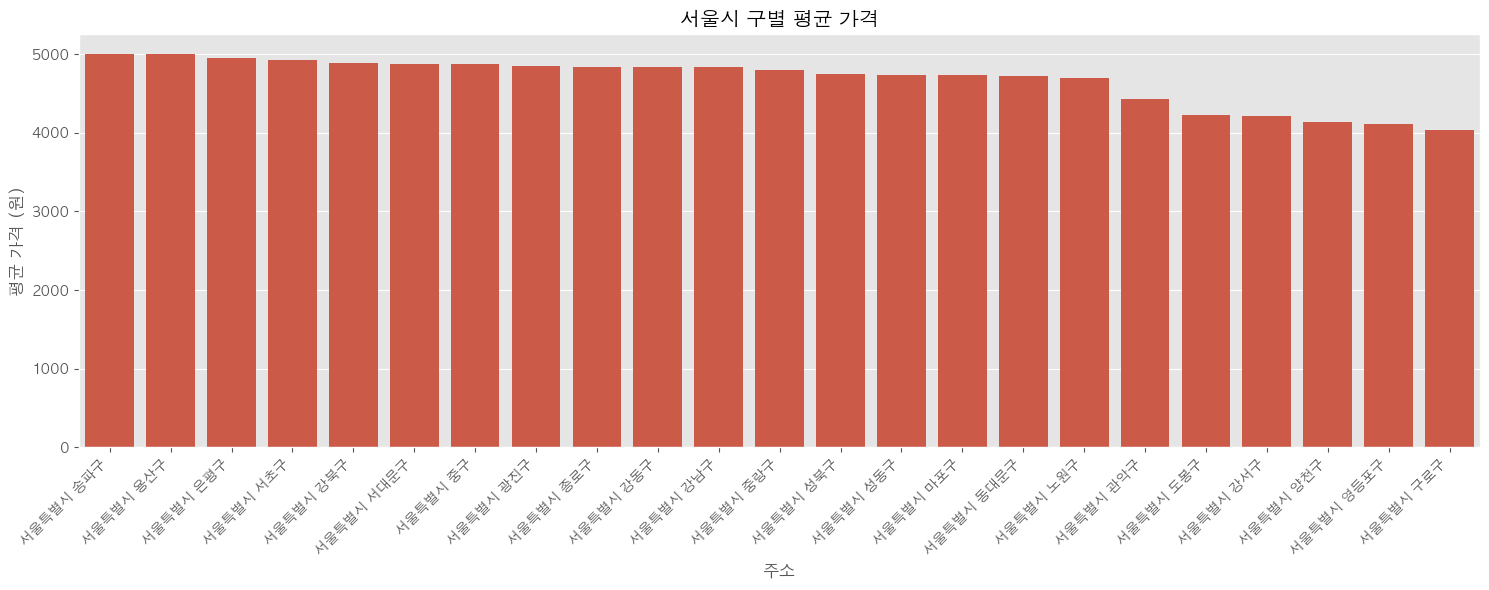

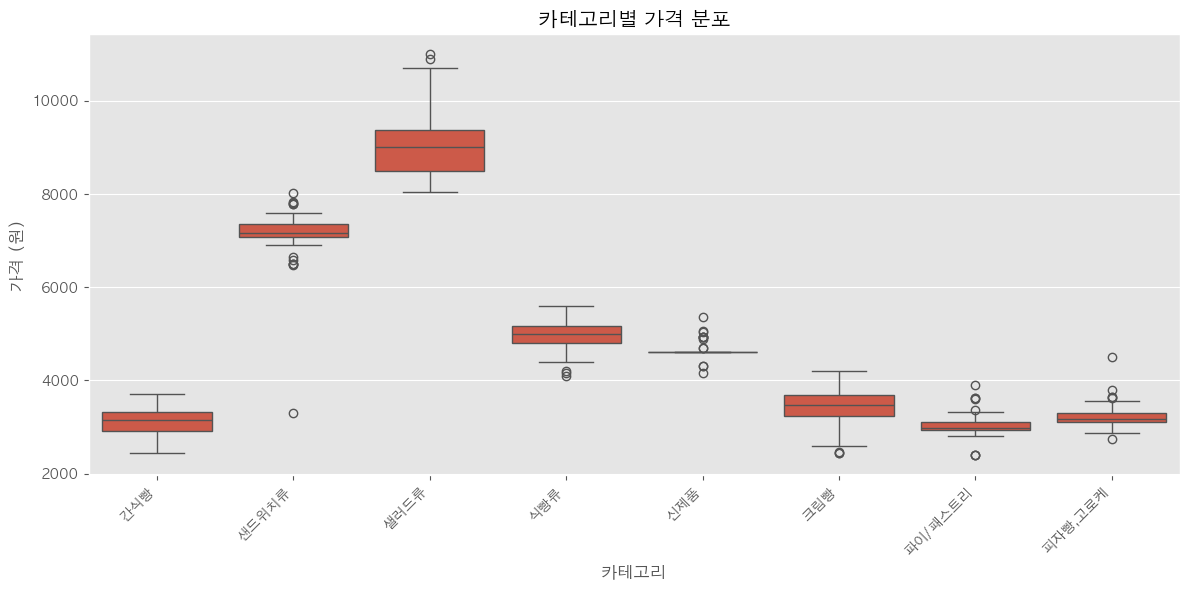

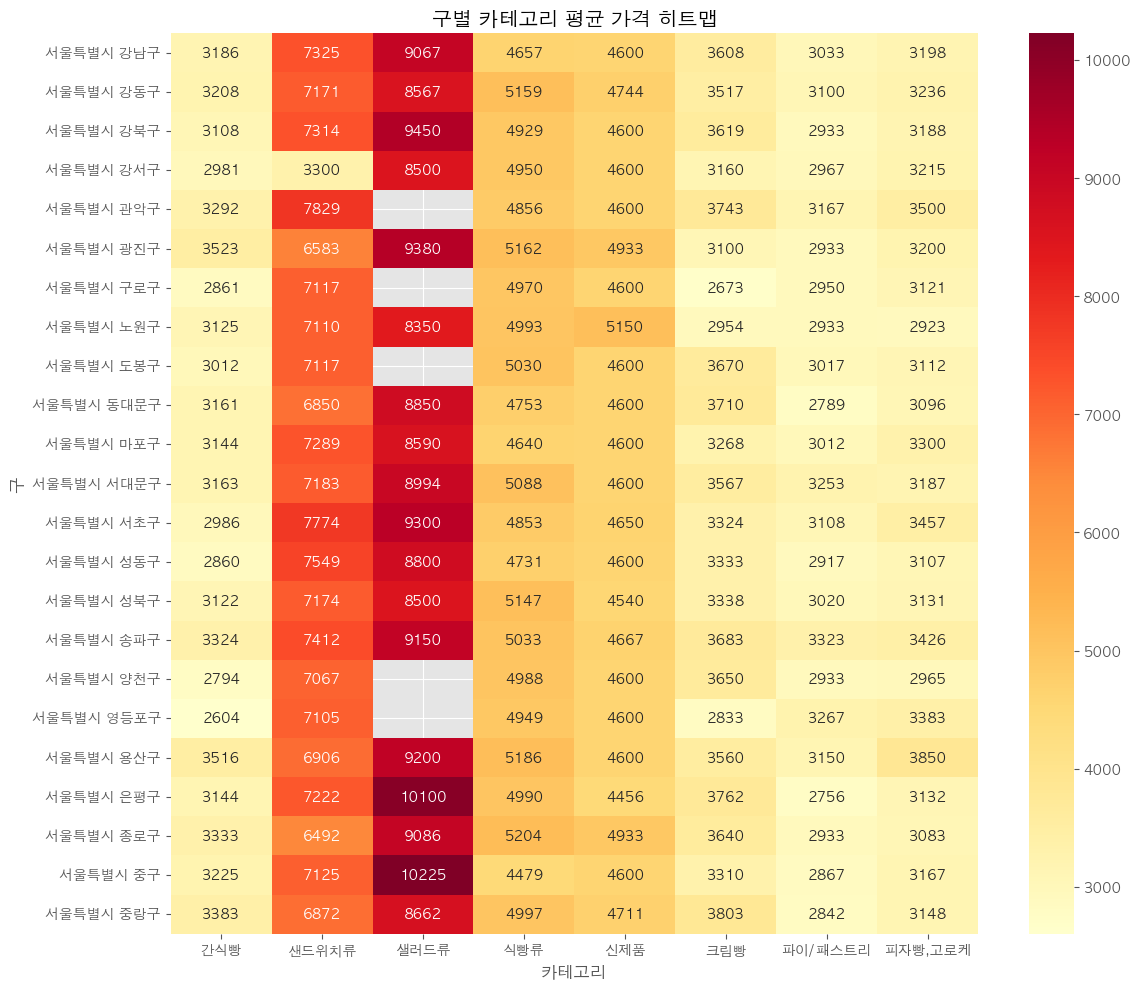

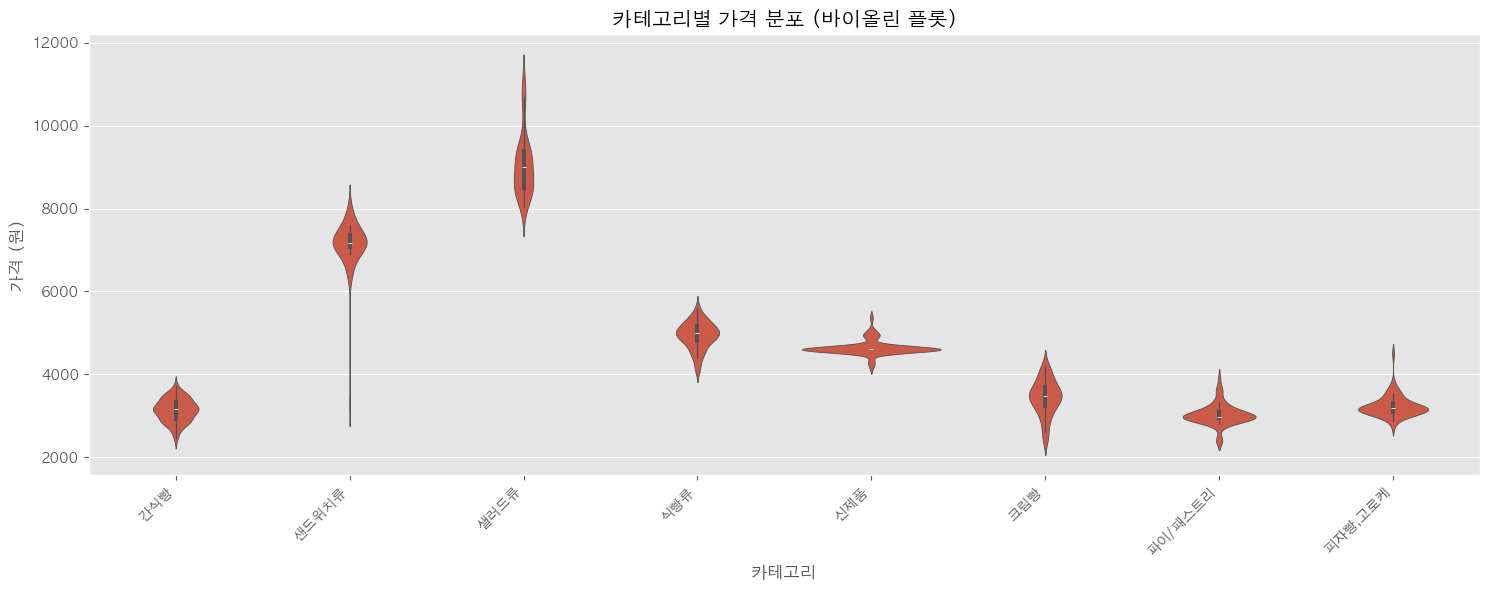

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc

# Mac OS 용 폰트 설정
plt.rc('font', family='AppleGothic') # 맥용 폰트 설정

# 그래프 기본 설정
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')


# 1. 구별 전체 평균 가격 분석
plt.figure(figsize=(15, 6))
grouped_data = result.groupby('주소')[['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']].mean().mean(axis=1).sort_values(ascending=False)

sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.title('서울시 구별 평균 가격')
plt.xticks(rotation=45, ha='right')
plt.ylabel('평균 가격 (원)')
plt.tight_layout()
plt.show()

# 2. 카테고리별 가격 분포 (박스플롯)
plt.figure(figsize=(12, 6))
categories = ['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']
data_melted = pd.melt(result, value_vars=categories)

sns.boxplot(x='variable', y='value', data=data_melted)
plt.title('카테고리별 가격 분포')
plt.xticks(rotation=45, ha='right')
plt.xlabel('카테고리')
plt.ylabel('가격 (원)')
plt.tight_layout()
plt.show()

# 3. 구별/카테고리별 평균 가격 히트맵
plt.figure(figsize=(12, 10))
pivot_data = result.groupby('주소')[categories].mean()
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('구별 카테고리 평균 가격 히트맵')
plt.ylabel('구')
plt.xlabel('카테고리')
plt.tight_layout()
plt.show()

# 5. 카테고리별 가격 분포 (바이올린 플롯)
plt.figure(figsize=(15, 6))
sns.violinplot(x='variable', y='value', data=data_melted)
plt.title('카테고리별 가격 분포 (바이올린 플롯)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('카테고리')
plt.ylabel('가격 (원)')
plt.tight_layout()
plt.show()

전처리 후 구별 빵가격 데이터:
      구분       평균_빵가격
0    강남구  4834.275000
1    강동구  4837.766667
2    강북구  4892.675000
3    강서구  4209.137500
4    관악구  4426.500000
5    광진구  4851.862500
6    구로구  4041.771429
7    노원구  4692.356250
8    도봉구  4222.478571
9   동대문구  4726.054167
10   마포구  4730.316071
11  서대문구  4879.220833
12   서초구  4931.512500
13   성동구  4737.000000
14   성북구  4746.501875
15   송파구  5002.184375
16   양천구  4142.414286
17  영등포구  4105.907143
18   용산구  4995.925000
19   은평구  4945.162500
20   종로구  4838.212500
21    중구  4874.656250
22   중랑구  4802.154167

전처리 후 아파트 가격 데이터:
      구분      매매 Unnamed: 2     전세 Unnamed: 4
1    강남구  7748.0      7,712  3,127      3,094
2    강동구  3767.0      3,773  1,848      1,852
3    강북구  2196.0      2,196  1,346      1,345
4    강서구  2930.0      2,929  1,625      1,625
5    관악구  2582.0      2,586  1,534      1,527
6    광진구  4131.0      4,129  2,127      2,137
7    구로구  2410.0      2,412  1,380      1,383
8    금천구  2202.0      2,202  1,298      1,298
9    노원구  2423.0     

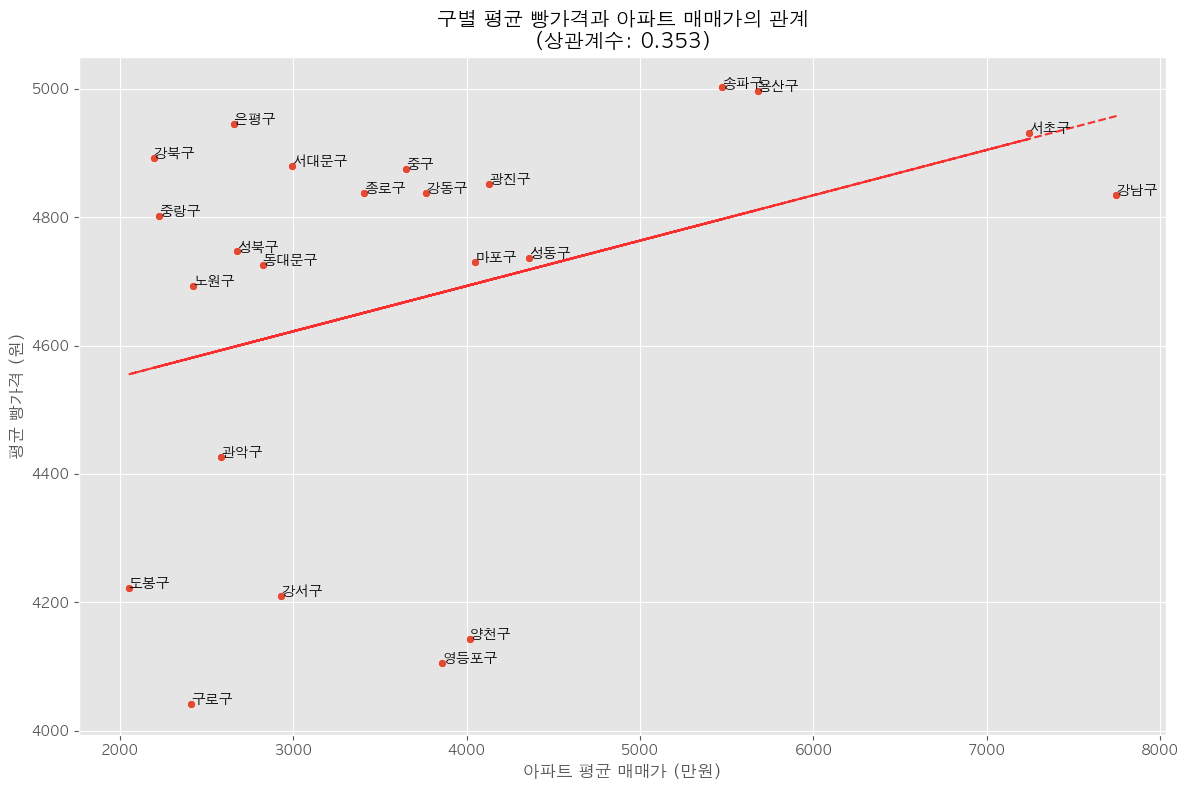


상관계수: 0.353
양의 상관관계가 있습니다: 아파트 가격이 높은 구일수록 빵 가격도 높은 경향이 있습니다.


In [13]:
# 1. 구별 평균 빵가격 계산
categories = ['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']
bread_price_by_district = result.groupby('주소')[categories].mean().mean(axis=1).reset_index()
bread_price_by_district.columns = ['구분', '평균_빵가격']
# '서울특별시'와 '구' 제거
bread_price_by_district['구분'] = bread_price_by_district['구분'].str.replace('서울특별시', '').str.strip()

# 아파트 가격 데이터 전처리
apt_price = pd.read_csv('seoul_APT_PRICE.csv')
# '서울특별시'와 '구' 제거
apt_price['구분'] = apt_price['구분'].str.replace('서울특별시', '').str.strip()
apt_price['매매'] = pd.to_numeric(apt_price['매매'].str.replace(',', ''), errors='coerce')
apt_price = apt_price.dropna()  # 결측치 제거

# 데이터 확인
print("전처리 후 구별 빵가격 데이터:")
print(bread_price_by_district)
print("\n전처리 후 아파트 가격 데이터:")
print(apt_price)

# 데이터 병합
merged_df = pd.merge(bread_price_by_district, apt_price[['구분', '매매']], on='구분', how='inner')
print("\n병합된 데이터:")
print(merged_df)

# 시각화
if not merged_df.empty:
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=merged_df, x='매매', y='평균_빵가격')
    
    # 추세선 추가
    x = merged_df['매매'].values
    y = merged_df['평균_빵가격'].values
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), "r--", alpha=0.8)
    
    # 각 점에 구 이름 표시
    for idx, row in merged_df.iterrows():
        plt.annotate(row['구분'], (row['매매'], row['평균_빵가격']))
    
    correlation = merged_df['평균_빵가격'].corr(merged_df['매매'])
    plt.title(f'구별 평균 빵가격과 아파트 매매가의 관계\n(상관계수: {correlation:.3f})')
    plt.xlabel('아파트 평균 매매가 (만원)')
    plt.ylabel('평균 빵가격 (원)')
    plt.tight_layout()
    plt.show()

    print(f"\n상관계수: {correlation:.3f}")
    if correlation > 0:
        print("양의 상관관계가 있습니다: 아파트 가격이 높은 구일수록 빵 가격도 높은 경향이 있습니다.")
    else:
        print("음의 상관관계가 있습니다: 아파트 가격이 높은 구일수록 빵 가격이 낮은 경향이 있습니다.")

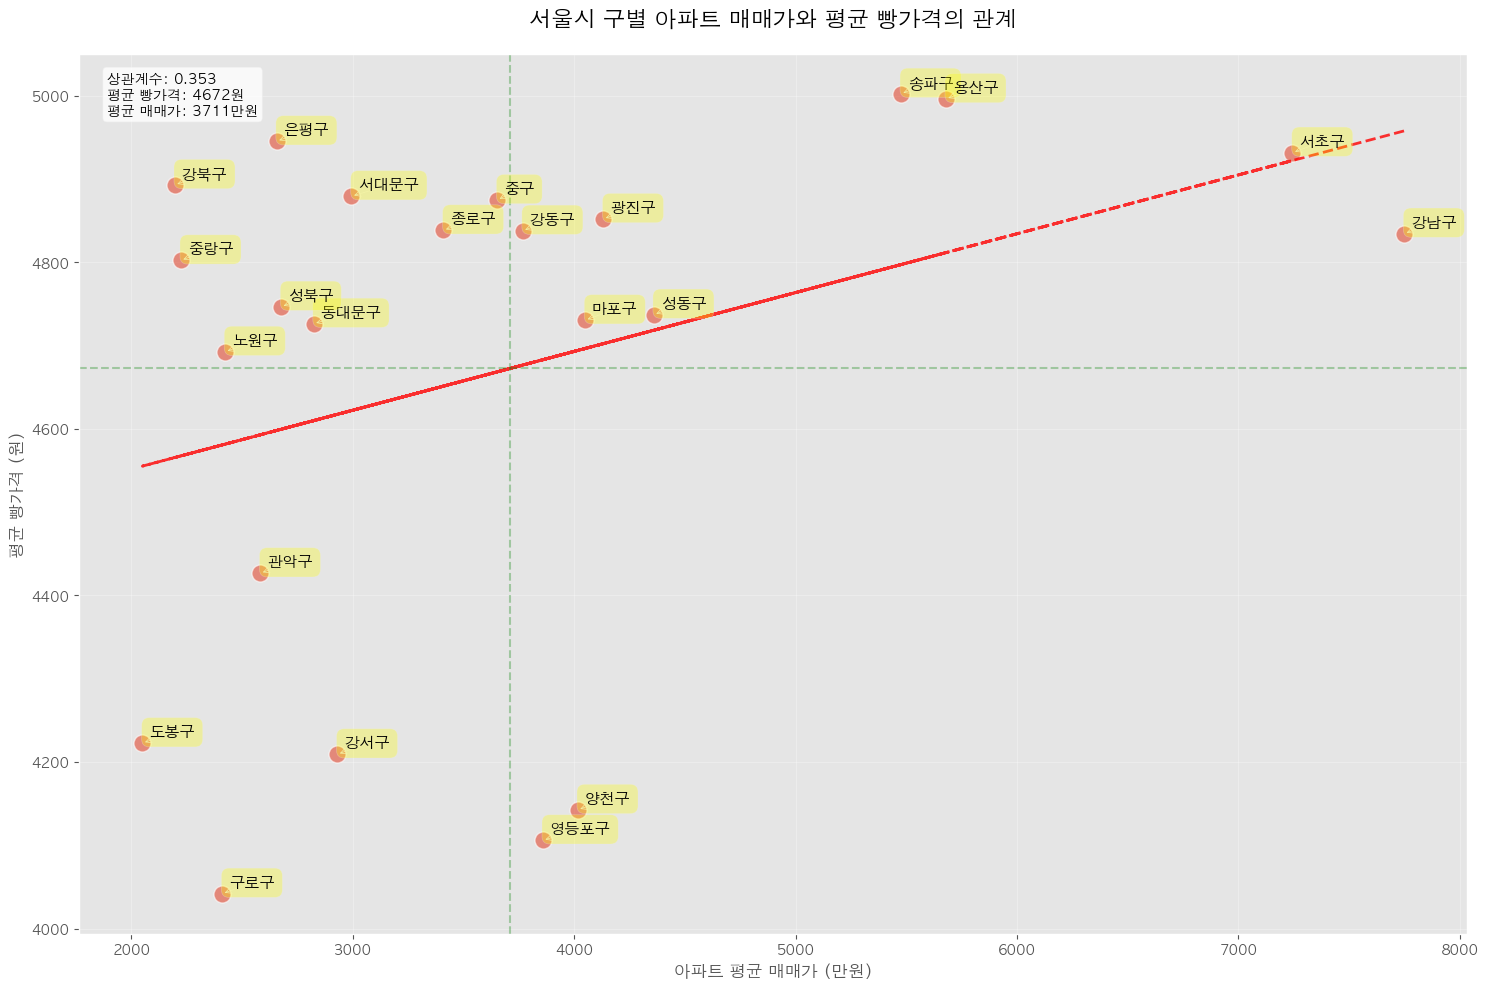


=== 구별 상세 데이터 ===

아파트 가격 상위 5개 구:
     구분      매매       평균_빵가격
0   강남구  7748.0  4834.275000
12  서초구  7244.0  4931.512500
18  용산구  5678.0  4995.925000
15  송파구  5475.0  5002.184375
13  성동구  4359.0  4737.000000

빵 가격 상위 5개 구:
     구분      매매       평균_빵가격
15  송파구  5475.0  5002.184375
18  용산구  5678.0  4995.925000
19  은평구  2656.0  4945.162500
12  서초구  7244.0  4931.512500
2   강북구  2196.0  4892.675000

순위 차이가 가장 큰 5개 구 (불일치도가 높은 구):
      구분      매매       평균_빵가격  순위_차이
2    강북구  2196.0  4892.675000   17.0
19   은평구  2656.0  4945.162500   14.0
16   양천구  4016.0  4142.414286   13.0
17  영등포구  3858.0  4105.907143   13.0
0    강남구  7748.0  4834.275000   10.0


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 시각화 스타일 설정
plt.style.use('ggplot') 
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.family'] = 'AppleGothic'

# 1. 메인 산점도 그래프
fig = plt.figure(figsize=(15, 10))

# 산점도 그리기
sns.scatterplot(data=merged_df, x='매매', y='평균_빵가격', s=150, alpha=0.6)

# 추세선 추가
z = np.polyfit(merged_df['매매'], merged_df['평균_빵가격'], 1)
p = np.poly1d(z)
plt.plot(merged_df['매매'], p(merged_df['매매']), "r--", linewidth=2, alpha=0.8)

# 각 점에 구 이름 표시 (더 보기 좋게 조정)
for idx, row in merged_df.iterrows():
    plt.annotate(row['구분'], 
                (row['매매'], row['평균_빵가격']),
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=11,
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# 평균선 추가
plt.axhline(y=merged_df['평균_빵가격'].mean(), color='g', linestyle='--', alpha=0.3)
plt.axvline(x=merged_df['매매'].mean(), color='g', linestyle='--', alpha=0.3)

# 상관계수 계산
correlation = merged_df['평균_빵가격'].corr(merged_df['매매'])

# 그래프 꾸미기
plt.title('서울시 구별 아파트 매매가와 평균 빵가격의 관계', fontsize=16, pad=20)
plt.xlabel('아파트 평균 매매가 (만원)', fontsize=12)
plt.ylabel('평균 빵가격 (원)', fontsize=12)

# 통계 정보 추가
stats_text = f'상관계수: {correlation:.3f}\n'
stats_text += f'평균 빵가격: {merged_df["평균_빵가격"].mean():.0f}원\n'
stats_text += f'평균 매매가: {merged_df["매매"].mean():.0f}만원'
plt.text(0.02, 0.98, stats_text,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 사분면 구분선 추가
plt.grid(True, alpha=0.3)

# 여백 조정
plt.tight_layout()

# 그래프 표시
plt.show()

# 2. 추가 분석: 구별 데이터 정렬 및 출력
print("\n=== 구별 상세 데이터 ===")
analysis_df = merged_df.copy()
analysis_df['가격_차이_순위'] = analysis_df['매매'].rank(ascending=False)
analysis_df['빵가격_순위'] = analysis_df['평균_빵가격'].rank(ascending=False)
analysis_df['순위_차이'] = abs(analysis_df['가격_차이_순위'] - analysis_df['빵가격_순위'])

# 결과 출력
print("\n아파트 가격 상위 5개 구:")
print(analysis_df.nlargest(5, '매매')[['구분', '매매', '평균_빵가격']])

print("\n빵 가격 상위 5개 구:")
print(analysis_df.nlargest(5, '평균_빵가격')[['구분', '매매', '평균_빵가격']])

print("\n순위 차이가 가장 큰 5개 구 (불일치도가 높은 구):")
print(analysis_df.nlargest(5, '순위_차이')[['구분', '매매', '평균_빵가격', '순위_차이']])